In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
def load_data (path):
    extention =path.split('.')[-1]
    if extention == 'csv':
       data = pd. read_csv(path)
    elif extention == 'json' :
       data = json.load(path)
    elif extention == 'txt' :
       with open(file_path, 'r') as file:
            data = file.read()
    elif extention == 'db':
        conn = sqlite3.connect(file_path)
        query = "SELECT * FROM ;"
        data = pd.read_sql(query, conn)
        conn.close()
    else:
        raise ValueError("Unsupported file extension")
    return data

In [6]:
path = 'C:\\Users\\tarek.elbaz\\OneDrive - Giza Systems\\Desktop\\datasets\\U.S. International Air Traffic data(1990-2020)\\International_Report_Departures.csv'

In [7]:
data = load_data(path)

In [8]:
data

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930803,07/01/2000,2000,7,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1422,0,1422
930804,04/01/2019,2019,4,13303,MIA,33,14286,PTY,162,19770,CM,0,Departures,1439,0,1439
930805,08/01/2000,2000,8,13303,MIA,33,13605,NAS,204,20398,MQ,1,Departures,1441,0,1441
930806,09/01/2004,2004,9,12266,IAH,74,15632,VSA,148,19534,AM,0,Departures,1461,0,1461


In [9]:
def check(df,df_ID):
    print(data.isnull().sum())
    if data.isnull().sum() .sum() == 0:
        print ('\nNO Null Value')
    else :
        print('\nWarning :Null value ,deal with it')
        for c in data.columns :
            print(c)
            if data[c].dtype !='object' :
                print(c)
                if data[c].isna().sum()> data.shape[0]/4:
                    #print(c,'n')
                    data[c].dropna()
                elif data[c].isna().sum()==0:
                    continue
                else :
                    #print(c,'else')
                    data[c].fillna(data[c].mean(),inplace=True)
            else :
                if data[c] .isna().sum()>0:
                    mode_category = data[c].mode()[0] 
                    data[c].fillna(value=mode_category, inplace=True)
                    
        print(data.isnull().sum())
    if df_ID.is_unique:
        print('\nSample is unique no duplicated')
        
    else :
        print('\ndupplicated , deal with it ...')
        data_unique = data.drop_duplicates(keep='first')
    
    return data

In [10]:
data=check(data,data.index)

data_dte           0
Year               0
Month              0
usg_apt_id         0
usg_apt            0
usg_wac            0
fg_apt_id          0
fg_apt             0
fg_wac             0
airlineid          0
carrier         3055
carriergroup       0
type               0
Scheduled          0
Charter            0
Total              0
dtype: int64

data_dte
Year
Year
Month
Month
usg_apt_id
usg_apt_id
usg_apt
usg_wac
usg_wac
fg_apt_id
fg_apt_id
fg_apt
fg_wac
fg_wac
airlineid
airlineid
carrier
carriergroup
carriergroup
type
Scheduled
Scheduled
Charter
Charter
Total
Total
data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

Sample is unique no duplicated


In [13]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

In [15]:
def cat(data):
    cat_feature=[i for  i in data.columns  if data[i].dtype =='object']
    return cat_feature
cat_feature = cat(data)
cat_feature

['data_dte', 'usg_apt', 'fg_apt', 'carrier', 'type']

In [16]:
def num(data):
    num_feature=[i for  i in data.columns  if data[i].dtype !='object']
    return num_feature
num_feature=num(data)
num_feature

['Year',
 'Month',
 'usg_apt_id',
 'usg_wac',
 'fg_apt_id',
 'fg_wac',
 'airlineid',
 'carriergroup',
 'Scheduled',
 'Charter',
 'Total']

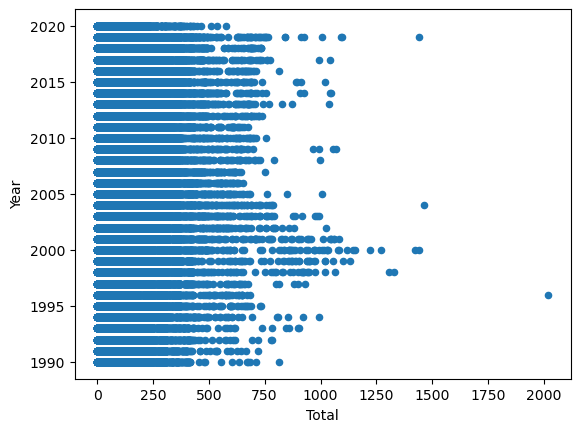

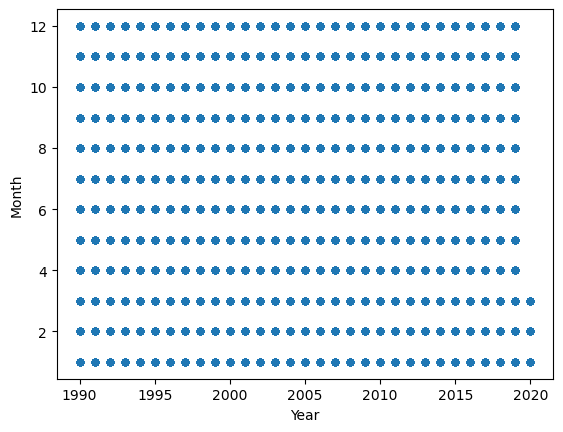

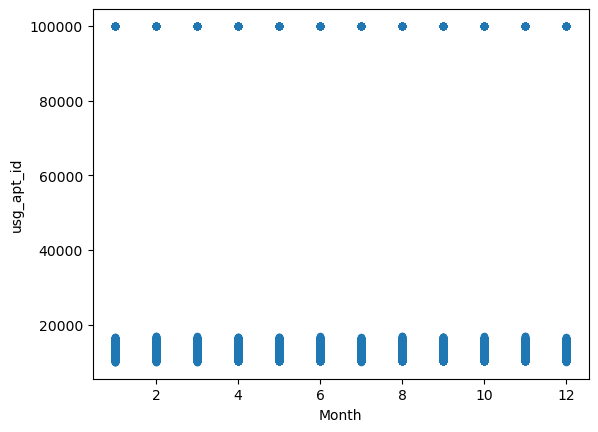

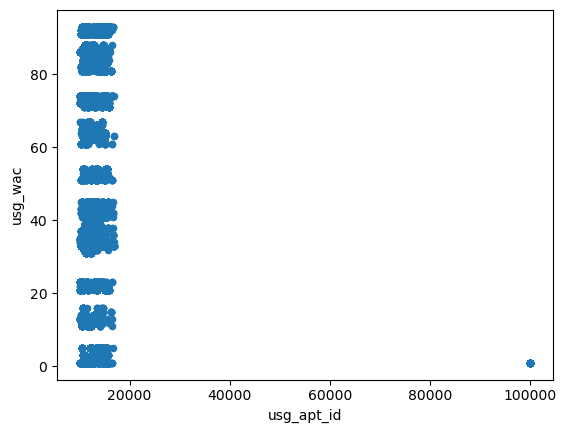

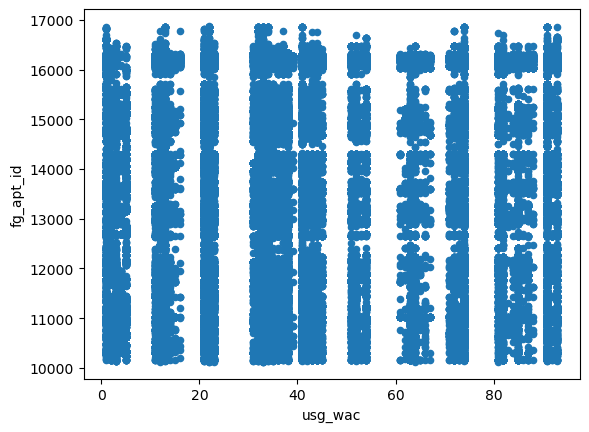

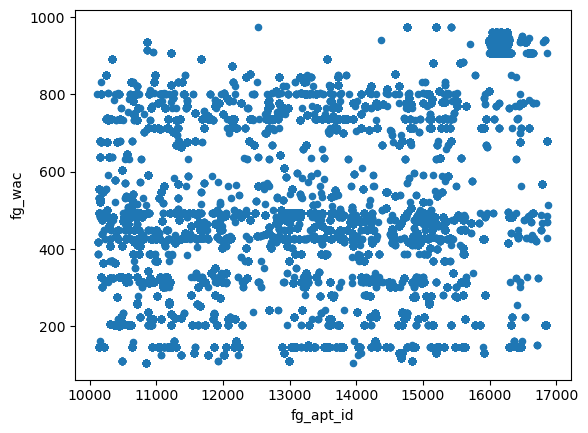

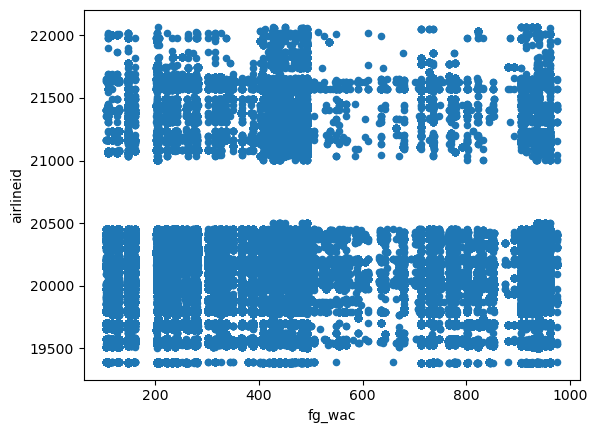

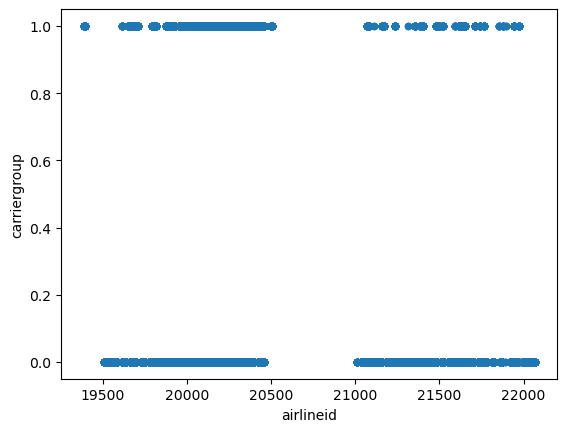

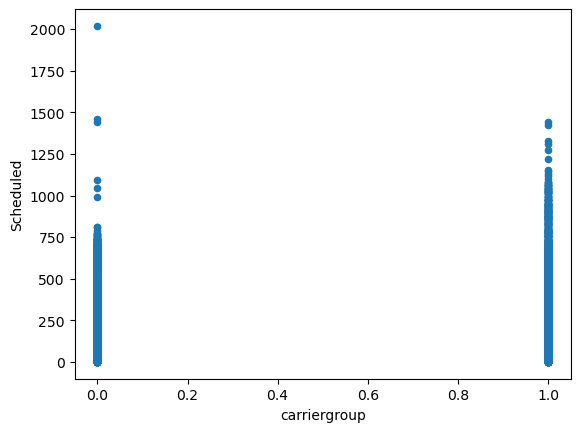

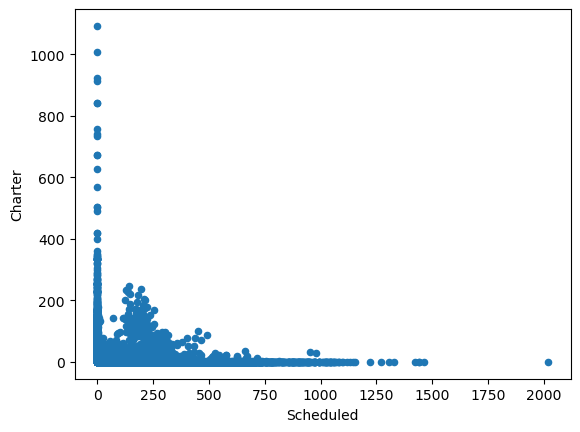

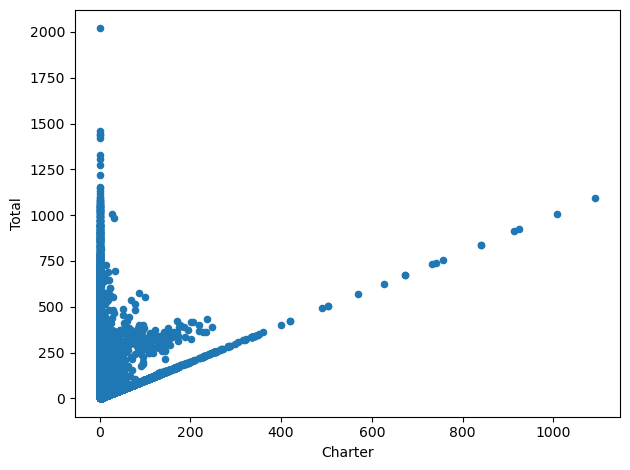

In [18]:
import seaborn as sns
def scatter(data,num_feature):
#_,ax = plt.subplots(3,3,figsize=(12,4))
    for i in range(0,len(num_feature)):
        data.plot.scatter(x=num_feature[i-1],y=num_feature[i])    
    plt.tight_layout()
    plt.show()
    
scatter(data,num_feature)

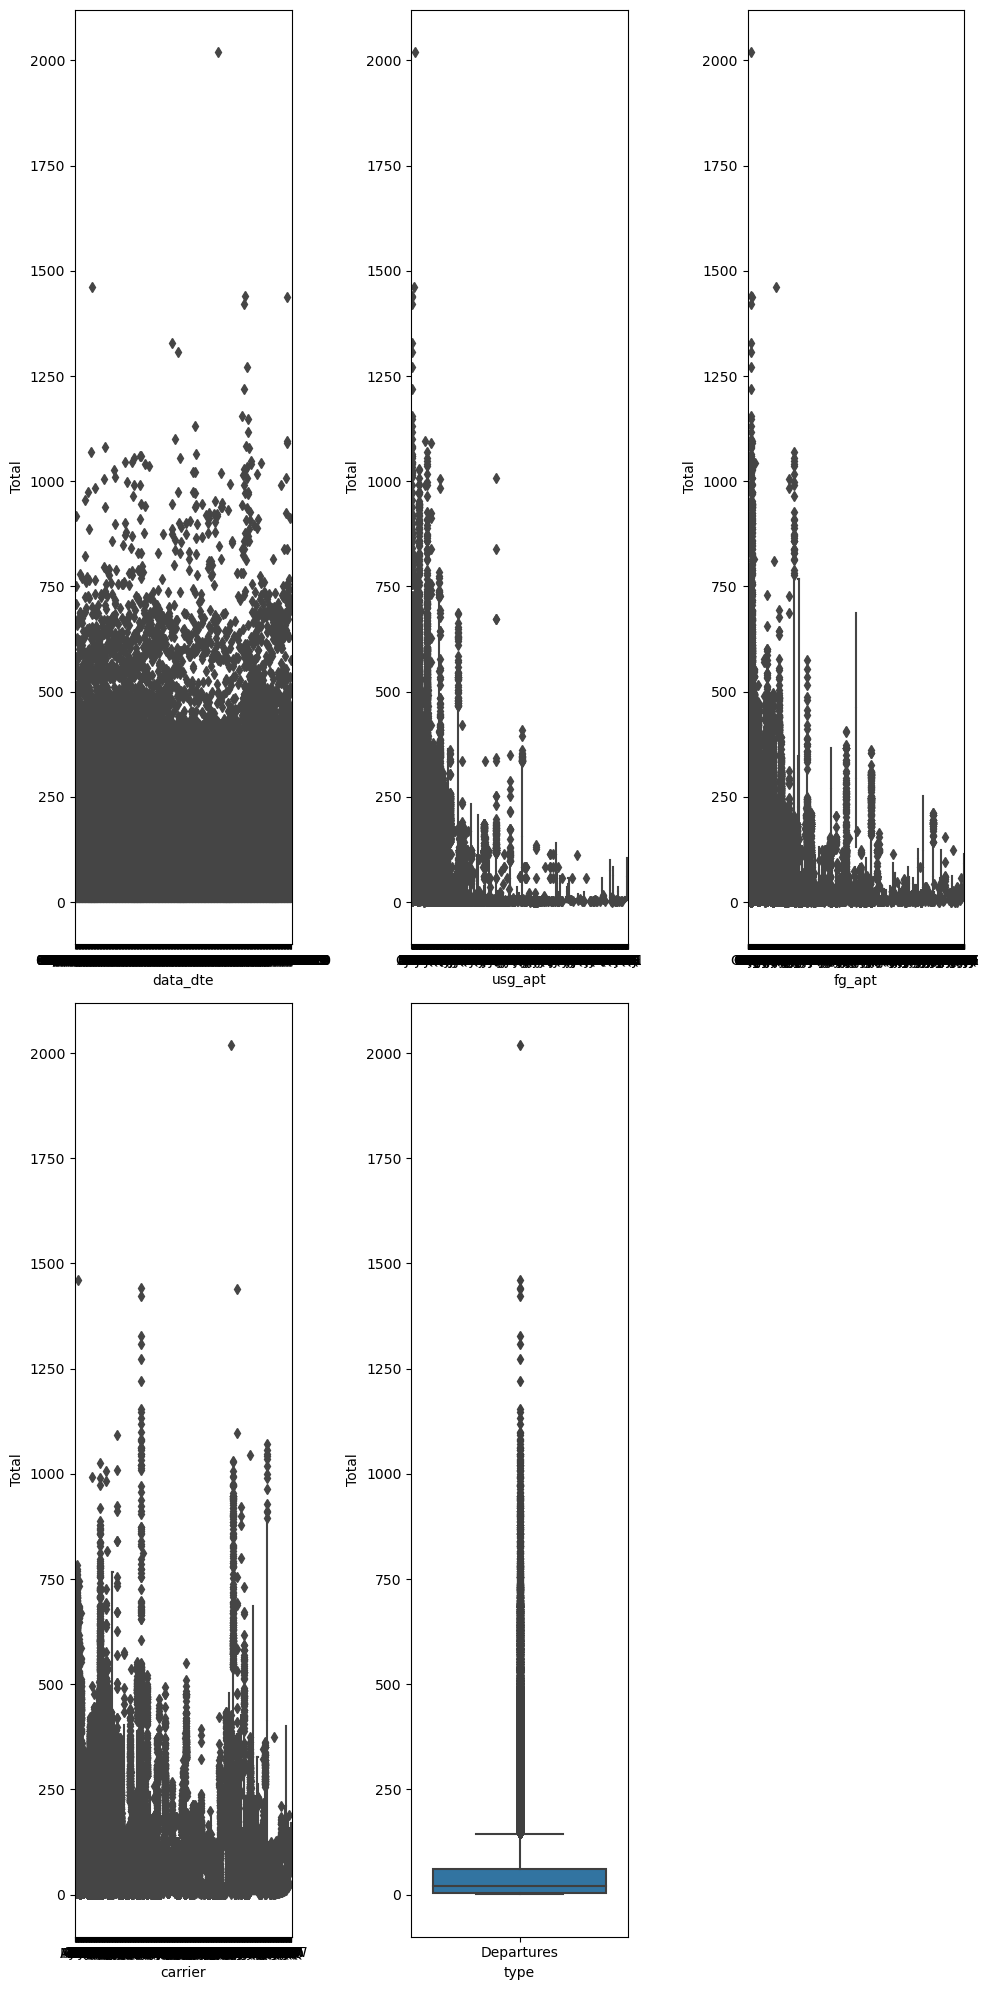

In [19]:
def box(data,cat_feature,target):
      if target.dtype  !='object':
        fig, axes = plt.subplots(len(cat_feature)//3+1, 3, figsize=(10, 20))

        for i, f in enumerate(cat_feature):
            row = i // 3  # Row index of the subplot
            col = i % 3  # Column index of the subplot
            sns.boxplot(x=f,y=target,data=data, ax=axes[row, col])
        for i in range(len(cat_feature), len(axes.ravel())):
            fig.delaxes(axes.ravel()[i])

        plt.tight_layout()  # Adjust subplot spacing
        plt.show()

    
box(data,cat_feature,data.iloc[:,-1])

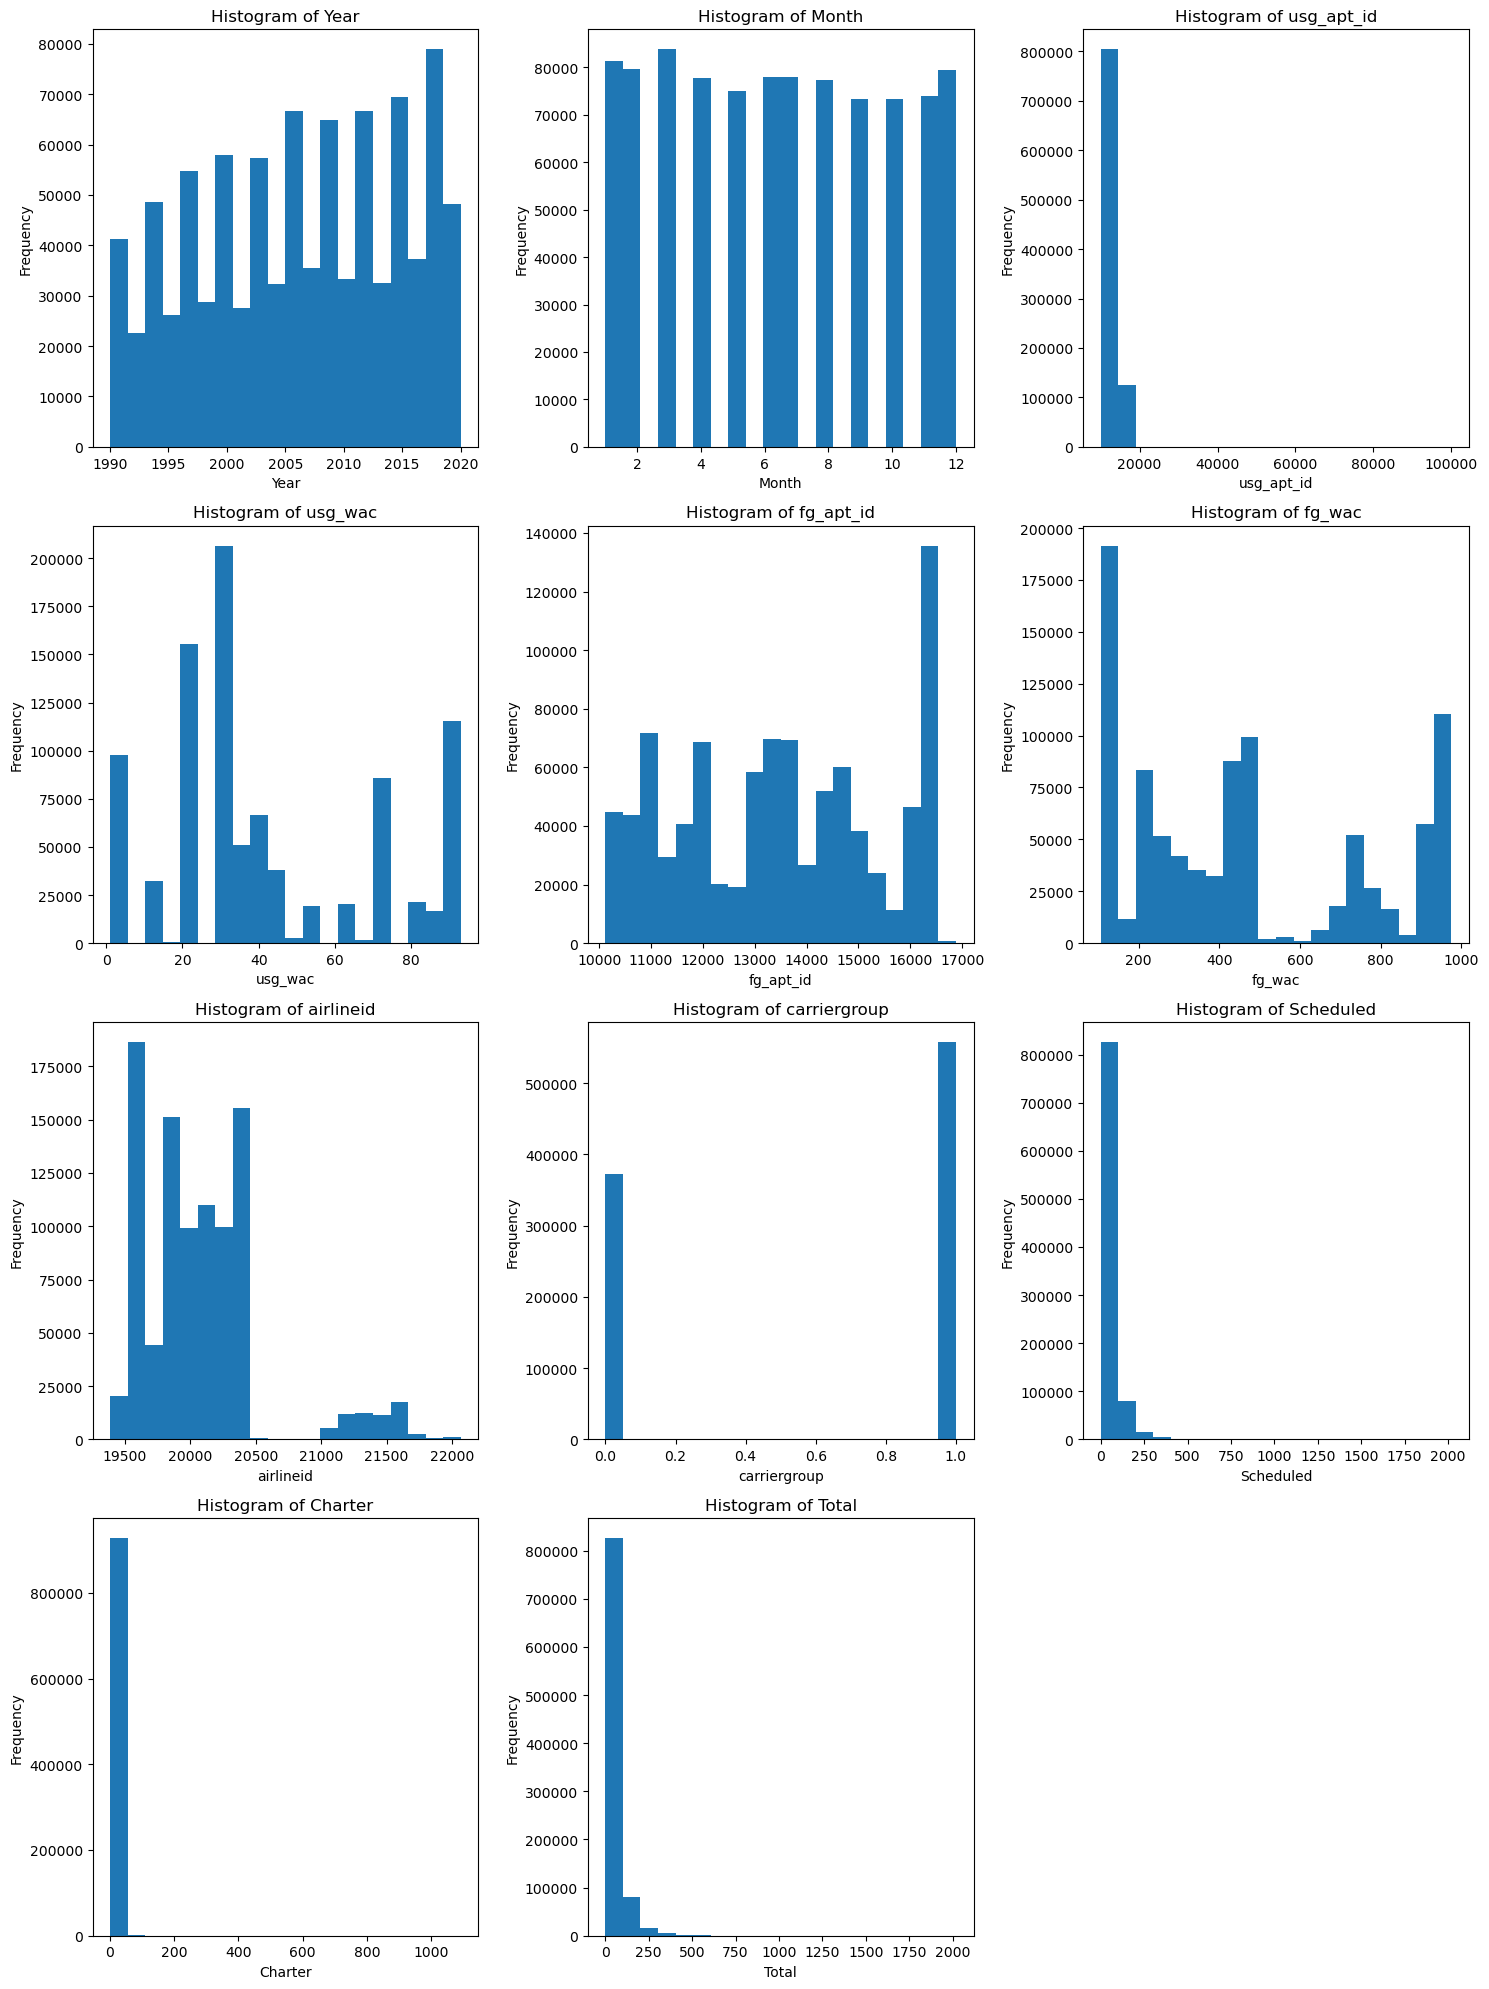

In [20]:
import matplotlib.pyplot as plt
def plot_histograms(data, num_features):
    num_cols = len(num_features)
    num_rows = (num_cols + 2) // 3  # Determine the number of rows for subplots

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

    for i, feature in enumerate(num_features):
        row = i // 3  # Calculate the row index
        col = i % 3   # Calculate the column index
        ax = axes[row, col]  # Select the current subplot

        # Plot the histogram for the current feature
        data[feature].plot(kind='hist', ax=ax, bins=20)
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

    # Remove empty subplots if necessary
    for i in range(num_cols, num_rows * 3):
        fig.delaxes(axes[i // 3, i % 3])

    plt.tight_layout()
    plt.show()
plot_histograms(data,num_feature)